# 2025-09-15 Stability

* Forward and backward stability

* Beyon IEEE double precision

See [FNC](https://tobydriscoll.net/fnc-julia/intro/stability.html#backward-error)

## Wilkinson's polynomial

$$ w \left( x \right) = \prod_{k = 1}^{20} \left( x - k \right) = \left( x - 1 \right) \left( x - 2 \right) \cdots \left( x - 20 \right) = \sum_{k = 0}^{20} b_k x^k $$

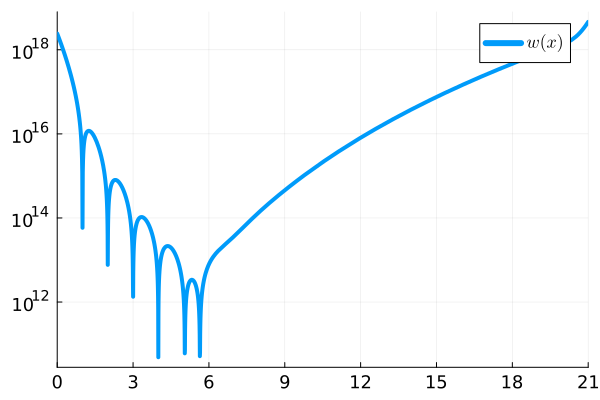

In [1]:
using Plots
using Polynomials
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

# Wilkinson's polynomial
n = 20
a = collect(1.:n)
w = fromroots(a)
w[10] *= 1 + 1 * 1e-10 # We can perturb coefficients

# And plot it
plot(x -> abs(w(x)), xlims=(0, n+1), yscale=:log10, label="\$w(x)\$")

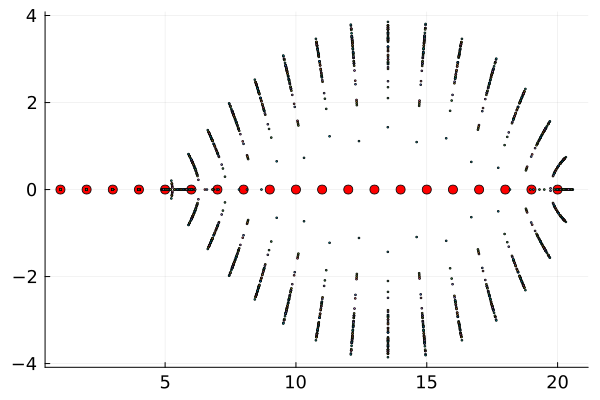

In [2]:
# We'll plot the true roots
w = fromroots(a)
scatter(a, zero(a), color=:red)

# Lets add little random perturbations and find the roots
for i in 1:100
    r = randn(length(w))
    q = copy(w)
    r[1:8] .= 0; r[10:end] .= 0 # zeroing out noise to all but 1 coeff
    q[:] .*= 1 .+ 1e-10 * r
    xs = roots(q)
    scatter!(real(xs), imag(xs), markersize=1)
end
plot!(legend=:none)

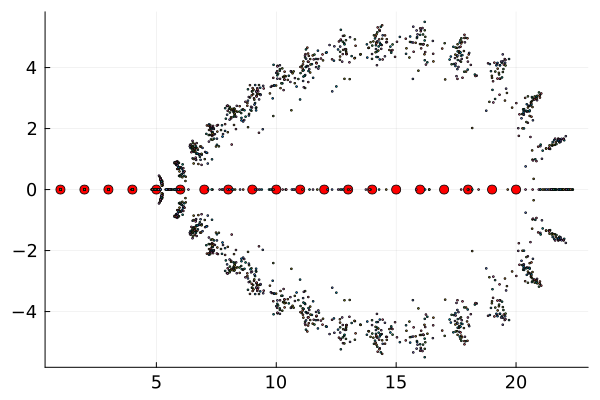

In [3]:
# We'll plot the true roots
w = fromroots(a)
scatter(a, zero(a), color=:red)

# Lets add little random perturbations and find the roots
for i in 1:100
    r = randn(length(w))
    q = copy(w) # instead adding noise to every root
    q[:] .*= 1 .+ 1e-10 * r
    xs = roots(q)
    scatter!(real(xs), imag(xs), markersize=1)
end
plot!(legend=:none)

### Figure from Trefethen and Bau (1999)

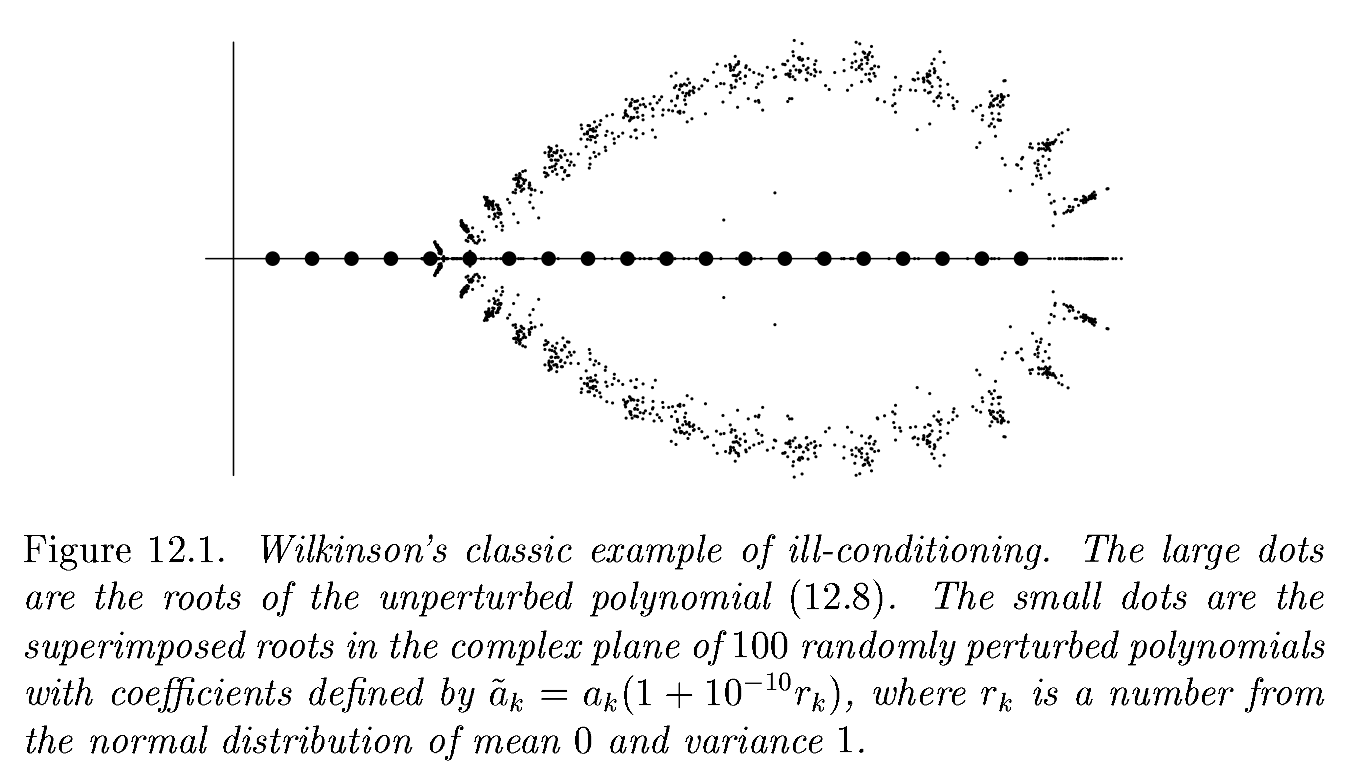

## So which is better for modeling inputs to a rootfinder?

A) coefficients $a_k$ in

$$ p \left( x \right) = \prod_k \left( x - a_k \right) $$

B) coefficients $b_k$ in

$$ p \left( x \right) = \sum_k b_k x^k $$

## Back to forward/backward error and stability

See [FNC](https://tobydriscoll.net/fnc-julia/intro/stability.html#backward-error)

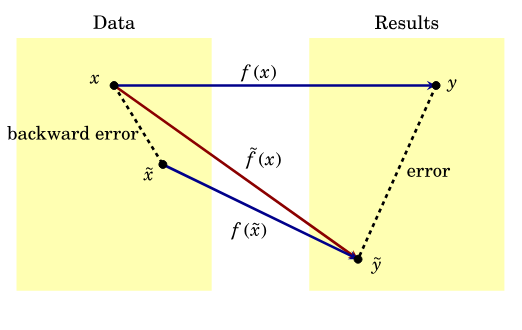

### Stability

**"nearly the right answer to nearly the right question"**

$$ \frac{\left\lvert \tilde{f} \left( x \right) - f \left( \tilde{x} \right) \right\rvert}{\left\lvert f \left( \tilde{x} \right) \right\rvert} \in \mathcal{O} \left( \epsilon_\text{machine} \right) $$

for some $\tilde{x}$ that is close to $x$.

### Backward stability

**"exactly the right answer to nearly the right question"**

$$ \tilde{f} \left( x \right) = f \left( \tilde{x} \right) $$

for some $\tilde{x}$ that is close to $x$.

* Every backward stable algorithm is stable

* Not every stable algorithm is backward stable

## Map angle to the unit circle

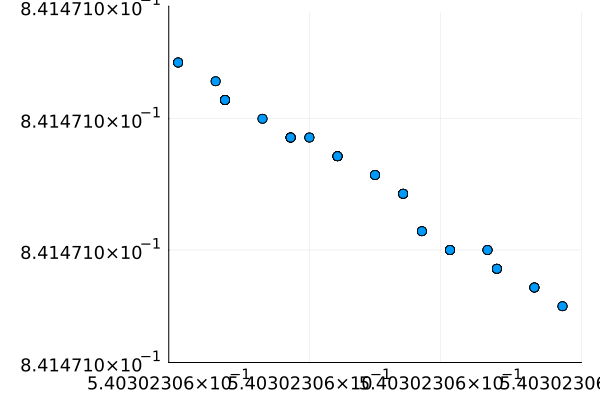

GKS: Possible loss of precision in routine SET_WINDOW


In [4]:
# The points on the unit circle *should* make a smooth curve
theta = 1 .+ LinRange(0, 3e-15, 100)
scatter(cos.(theta), sin.(theta), legend=:none, aspect_ratio=:equal)

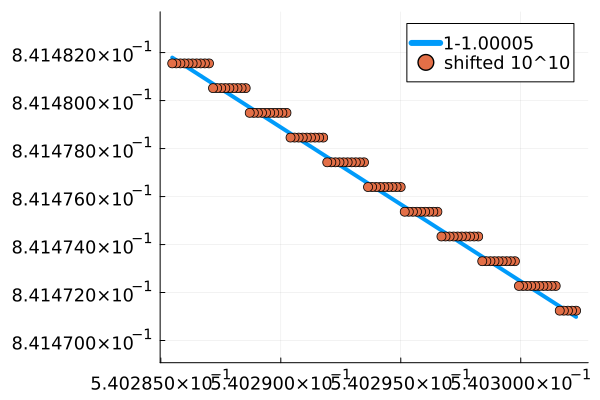

In [5]:
# Lets shift the range of the inputs for sin
theta = LinRange(1., 1+2e-5, 100)
mysin(t) = cos(t - (1e10+1)*pi/2)

plot(cos.(theta), sin.(theta), aspect_ratio=:equal, label="1-1.00005")
scatter!(cos.(theta), mysin.(theta), label="shifted 10^10")

Is this

a) stability

b) backward stability

c) neither

* The numbers $\left( \tilde{\cos} \left( \theta \right), \tilde{\sin} \left( \theta \right) \right) = \left( fl \left( \cos \left( \theta \right) \right), fl \left( \sin \left( \theta \right) \right) \right)$ do not lie exactly on the unit circles

* There does not exist a $\tilde{\theta}$ such that $\left( \tilde{\cos} \left( \theta \right), \tilde{\sin} \left( \theta \right) \right) = \left( \cos \left( \tilde{\theta} \right), \sin \left( \tilde{\theta} \right) \right)$

## Theorem - accuracy of backward stable algorithms

A backward stable algorithm for computing $f \left( x \right)$ has relative accuracy

$$ \frac{\left\lvert \tilde{f} \left( x \right) - f \left( \tilde{x} \right) \right\rvert}{\left\lvert f \left( \tilde{x} \right) \right\rvert} \lesssim \kappa \left( f \right) \epsilon_\text{machine} $$

Backward stability is generally the best we can hope for.

<br>

In practice, it is rarely possible for a function to be backward stable when the output space is higher dimensional than the input space.

## Beyond IEEE-754 double precision

Double precision floating point numbers are common, but they are not our only option.

### Lower precision IEEE-754 values

| Type   | $\epsilon_\text{machine}$ | exponent bits | mantissa bits |
| ------ | ------------------------- | ------------- | ------------- |
| double | 1.11e-16                  | 11            | 52            |
| single | 5.96-8                    | 8             | 23            |
| [half](https://en.wikipedia.org/wiki/Half-precision_floating-point_format) | 4.88e-4                  | 5             | 10            |
| [bfloat16](https://en.wikipedia.org/wiki/Bfloat16_floating-point_format) | 3.91e-3                  | 8             | 7             |

The default floating point type in Julia is `double` precision, with uses 8 bytes (64 bits).
IEEE-754 **single precision** (`float` in C) is half the size, 8 bytes (32 bits) and is popular where appropriate.
IEEE-754 **half precision** reduces both the exponent and mantissa to fit into 4 bytes (16 bits).
**bfloat16** is a non-IEEE type that is popular in machine learning due to it being easy to convert to/from single precision (truncate/round the mantissa).

### Posits

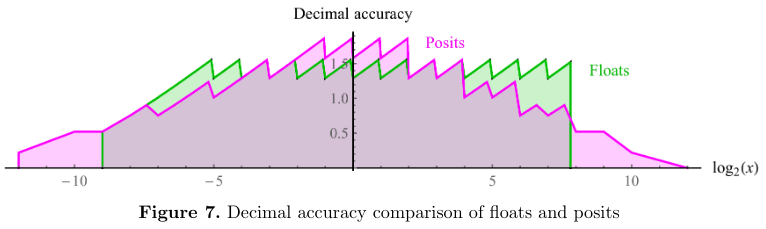

* [Gustafson and Yonemoto: **Beating Floating Point at its Own Game: Posit Arithmetic**](http://www.johngustafson.net/pdfs/BeatingFloatingPoint.pdf)

* [de Dinechin: **Posits: the good, the bad and the ugly**](https://people.eecs.berkeley.edu/~demmel/ma221_Fall20/Dinechin_etal_2019.pdf)

* [Interactive visualzation](https://cse512-19s.github.io/FP-Well-Rounded)

* Julia package [SoftPosit.jl](https://github.com/milankl/SoftPosit.jl)

### Mixed-precision algorithms

Sometimes reducing the precision (from double to single, or from single to half) compromises the quality of results (due to ill-conditioning or poor stability), but one can recover accurate results by using higher precision in a small fraction of the computation.
These are mixed-precision algorithms, and can be a useful optimization technique.

Such techniques can give up to 2x improvement if memory bandwidth (for floating point data) or pure vectorizable flops are the bottleneck.
In case of single to half precision, the benefit can be greater than 2x when using special hardware, such as GPUs with “tensor cores”.

Warning: Premature use of mixed-precision techniques can often obscure better algorithms that can provide greater speedups and/or reliability improvements.